In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("FuelConsumption.csv")

In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


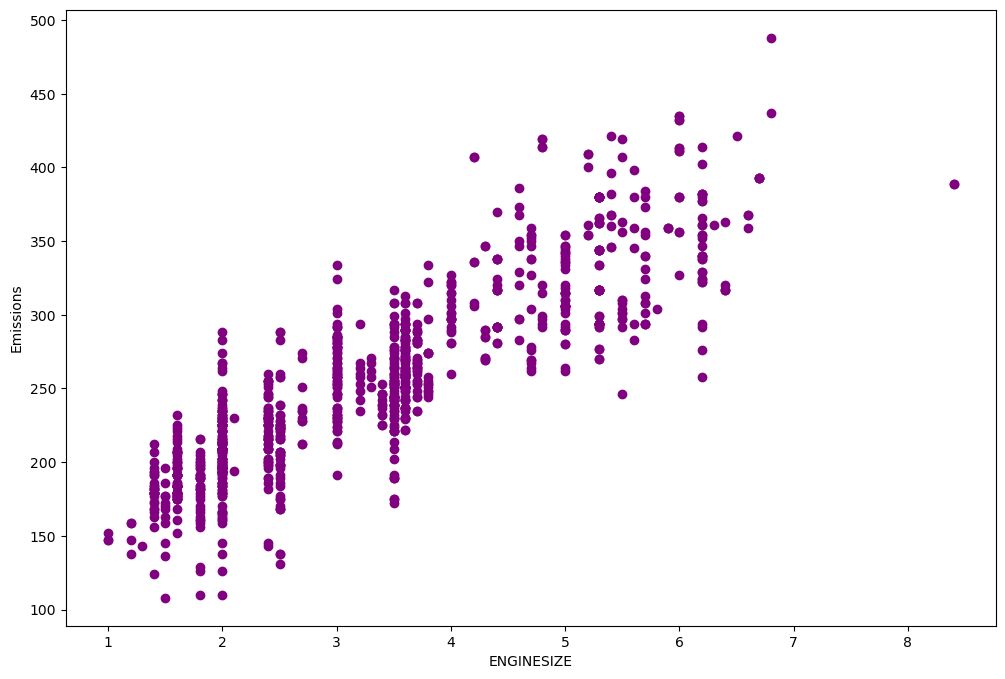

In [9]:
plt.rcParams['figure.figsize']=(12,8)
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="purple")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2)

- In polynomial regression, the relationship between the independent variable x and the dependent variable y is modeled as nth degree polynominal in x.                    
2nd degree:                                               
y=b+Q1 x+ Q2 x^2                                        


In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [11]:
train_x=np.asanyarray(train[["ENGINESIZE"]])
train_y=np.asanyarray(train[["CO2EMISSIONS"]])

test_x=np.asanyarray(test[["ENGINESIZE"]])
test_y=np.asanyarray(test[["CO2EMISSIONS"]])

poly=PolynomialFeatures(degree=2)

In [12]:
train_x_poly=poly.fit_transform(train_x)
print(train_x_poly)

[[ 1.    1.8   3.24]
 [ 1.    2.    4.  ]
 [ 1.    3.    9.  ]
 ...
 [ 1.    6.4  40.96]
 [ 1.    1.8   3.24]
 [ 1.    4.   16.  ]]


In [13]:
from sklearn import linear_model
clf=linear_model.LinearRegression()

In [14]:
train_y=clf.fit(train_x_poly,train_y)
print("Coefficients: " ,clf.coef_)
print("Intercept: ", clf.intercept_)


Coefficients:  [[ 0.         47.9882044  -1.29823152]]
Intercept:  [112.52389979]


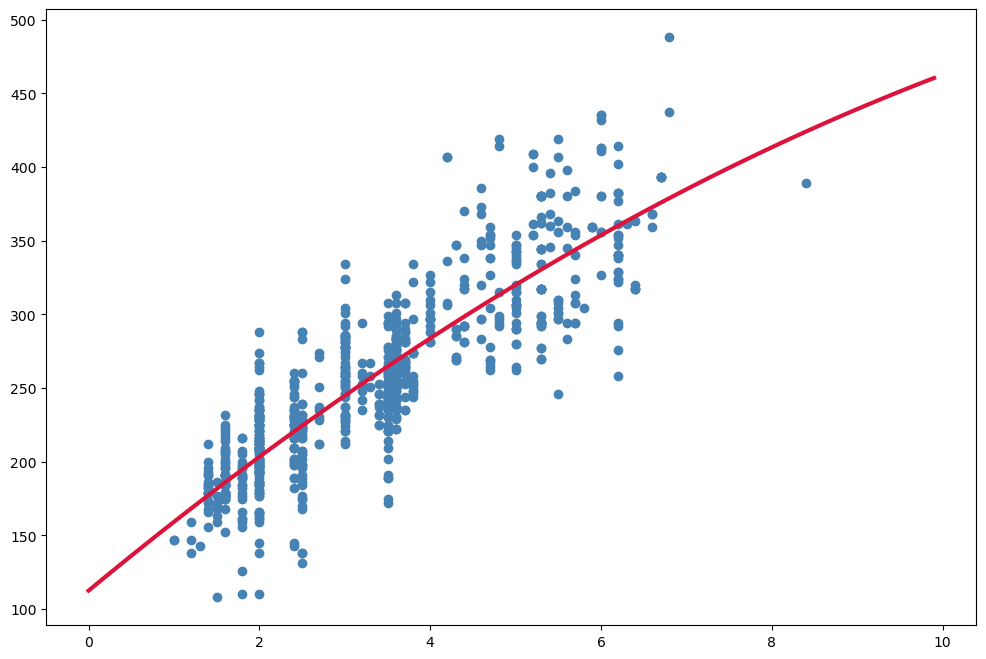

In [21]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="steelblue")
XX=np.arange(0.0,10.0,0.1)
yy=clf.intercept_[0]+clf.coef_[0][1]*XX+ clf.coef_[0][2] * np.power(XX,2)
plt.plot(XX,yy,"crimson",linewidth=3)

# Evaluation

In [22]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


test_y_predicted = clf.predict(poly.fit_transform(test_x))

# R-kare değeri
r2 = r2_score(test_y, test_y_predicted)
print("R-squared:", r2)

# Ortalama Karesel Hata (MSE)
mse = mean_squared_error(test_y, test_y_predicted)
print("Mean Squared Error:", mse)

# Ortalama Mutlak Hata (MAE)
mae = mean_absolute_error(test_y, test_y_predicted)
print("Mean Absolute Error:", mae)

R-squared: 0.8132711583709048
Mean Squared Error: 888.254567758011
Mean Absolute Error: 22.68517388865732
